In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error


df_NBA = pd.read_csv('since_2005_data_with_scores.csv')
df_NBA

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_arena,away_attend,away_attend_g,home_score,away_score
0,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,...,0.273,0.481,14.2,70.1,0.274,FleetCenter,656081.0,16002.0,120,117
1,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,...,0.217,0.497,14.7,70.9,0.269,Charlotte Coliseum,591701.0,14432.0,90,93
2,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,...,0.233,0.454,14.4,72.6,0.262,United Center,828384.0,20204.0,105,114
3,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,...,0.244,0.485,14.1,71.5,0.248,Gund Arena,784249.0,19128.0,-1,-1
4,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,...,0.273,0.472,14.3,70.2,0.239,American Airlines Center,822533.0,20062.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,2024,NBA,Washington Wizards,WAS,False,25.7,1.0,2.0,1.0,2.0,...,0.172,0.525,13.3,71.5,0.232,Moda Center,19464.0,19464.0,-1,-1
17396,2024,NBA,Washington Wizards,WAS,False,25.7,1.0,2.0,1.0,2.0,...,0.180,0.547,12.6,76.7,0.221,Golden 1 Center,36448.0,18224.0,-1,-1
17397,2024,NBA,Washington Wizards,WAS,False,25.7,1.0,2.0,1.0,2.0,...,0.180,0.580,13.7,76.5,0.139,Frost Bank Center,37301.0,18651.0,-1,-1
17398,2024,NBA,Washington Wizards,WAS,False,25.7,1.0,2.0,1.0,2.0,...,0.146,0.461,12.5,73.2,0.189,Scotiabank Arena,58866.0,19622.0,-1,-1


In [2]:
#view distribution of numerical data
pd.set_option('display.max_columns', None)

df_NBA.describe()

,season,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g,away_season,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score
count,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17284.000000,17284.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17284.000000,17284.000000,17400.000000,17400.000000
mean,2014.500000,26.494833,38.103333,38.103333,38.158333,38.048333,-0.005050,-0.012667,-0.017850,108.327167,108.322500,0.004667,95.013833,0.281502,0.287508,0.548420,0.509112,13.172000,25.047333,0.214338,0.509063,13.171333,74.931167,0.214402,641962.416107,16904.773490,2014.500000,26.494833,38.103333,38.103333,38.158333,38.048333,-0.005050,-0.012667,-0.017850,108.327167,108.322500,0.004667,95.013833,0.281502,0.287508,0.548420,0.509112,13.172000,25.047333,0.214338,0.509063,13.171333,74.931167,0.214402,641962.416107,16904.773490,73.205805,71.308966
std,5.766447,1.715564,14.570685,14.489239,14.270540,14.174068,4.837933,1.287632,4.707929,4.313446,4.042431,5.031878,4.116167,0.040033,0.085281,0.023737,0.026481,1.072823,3.093861,0.029769,0.024747,1.152528,2.620357,0.029844,211782.565046,3798.695073,5.766447,1.715564,14.570685,14.489239,14.270540,14.174068,4.837933,1.287632,4.707929,4.313446,4.042431,5.031878,4.116167,0.040033,0.085281,0.023737,0.026481,1.072823,3.093861,0.029769,0.024747,1.152528,2.620357,0.029844,211782.565046,3798.695073,48.941264,47.734575
min,2005.000000,22.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-11.310000,-14.040000,95.200000,98.200000,-15.200000,86.300000,0.163000,0.105000,0.483000,0.439000,9.800000,15.100000,0.111000,0.450000,8.600000,67.700000,0.083000,5817.000000,162.000000,2005.000000,22.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-11.310000,-14.040000,95.200000,98.200000,-15.200000,86.300000,0.163000,0.105000,0.483000,0.439000,9.800000,15.100000,0.111000,0.450000,8.600000,67.700000,0.083000,5817.000000,162.000000,-1.000000,-1.000000
25%,2009.750000,25.300000,29.000000,29.000000,31.000000,29.750000,-3.170000,-0.280000,-3.112500,105.200000,105.500000,-3.325000,91.600000,0.254000,0.219750,0.532000,0.490000,12.500000,22.775000,0.194000,0.491000,12.400000,73.100000,0.194750,615353.500000,15958.000000,2009.750000,25.300000,29.000000,29.000000,31.000000,29.750000,-3.170000,-0.280000,-3.112500,105.200000,105.500000,-3.325000,91.600000,0.254000,0.219750,0.532000,0.490000,12.500000,22.775000,0.194000,0.491000,12.400000,73.100000,0.194750,615353.500000,15958.000000,-1.000000,-1.000000
50%,2014.500000,26.300000,40.000000,39.000000,40.000000,39.000000,0.210000,0.000000,0.025000,107.800000,108.100000,0.200000,94.900000,0.278000,0.277000,0.546000,0.505500,13.200000,24.900000,0.211000,0.508000,13.200000,74.900000,0.212000,696374.500000,17489.500000,2014.500000,26.300000,40.000000,39.000000,40.000000,39.000000,0.210000,0.000000,0.025000,107.800000,108.100000,0.200000,94.900000,0.278000,0.277000,0.546000,0.505500,13.200000,24.900000,0.211000,0.508000,13.200000,74.900000,0.212000,696374.500000,17489.500000,96.000000,94.000000
75%,2019.250000,27.525000,49.000000,48.000

In [3]:
#only have game score data through 2021 season (2020-2021 season)
#matchups without scores have -1 as a placeholder
#drop all matchups with -1 for home_score

df_NBA1 = df_NBA.drop(df_NBA[df_NBA['home_score']==-1].index)
df_NBA1

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g,away_season,away_lg,away_team,away_abbreviation,away_playoffs,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_arena,away_attend,away_attend_g,home_score,away_score
0,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Boston Celtics,BOS,True,27.1,45.0,37.0,43.0,39.0,0.87,-0.52,0.35,107.5,106.6,0.9,93.3,0.357,0.192,0.551,0.501,14.7,27.2,0.273,0.481,14.2,70.1,0.274,FleetCenter,656081.0,16002.0,120,117
1,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Charlotte Bobcats,CHA,False,24.9,18.0,64.0,24.0,58.0,-5.99,-0.16,-6.15,101.1,107.5,-6.4,92.3,0.306,0.128,0.497,0.455,13.3,29.5,0.217,0.497,14.7,70.9,0.269,Charlotte Coliseum,591701.0,14432.0,90,93
2,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Chicago Bulls,CHI,True,25.0,47.0,35.0,44.0,38.0,1.06,-0.41,0.65,101.4,100.3,1.1,92.4,0.311,0.217,0.517,0.471,15.5,28.4,0.233,0.454,14.4,72.6,0.262,United Center,828384.0,20204.0,105,114
5,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Denver Nuggets,DEN,True,26.7,49.0,33.0,47.0,35.0,2.02,0.20,2.23,106.0,103.9,2.1,93.5,0.350,0.142,0.535,0.483,13.8,28.4,0.267,0.482,15.1,71.7,0.247,Pepsi Center,723949.0,17657.0,110,107
6,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Detroit Pistons,DET,True,27.9,54.0,28.0,53.0,29.0,3.87,-0.55,3.31,105.6,101.2,4.4,87.2,0.335,0.164,0.519,0.472,13.3,31.2,0.247,0.461,13.5,73.0,0.207,The Palace of Auburn Hills,905116.0,22076.0,68,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,2021,NBA,Washington Wizards,WAS,True,26.6,34.0,38.0,32.0,40.0,-1.83,-0.01,-1.85,111.2,113.0,-1.8,104.1,0.288,0.319,0.569,0.531,12.3,21.3,0.221,0.539,12.5,77.6,0.217,Capital One Arena,19198.0,533.0,2021,NBA,Portland Trail Blazers,POR,True,27.4,42.0,30.0,40.0,32.0,1.79,0.01,1.81,117.8,116.0,1.8,98.4,0.238,0.448,0.577,0.540,9.9,23.0,0.195,0.546,11.2,77.5,0.203,Moda Center,5817.0,162.0,121,132
14786,2021,NBA,Washington Wizards,WAS,True,26.6,34.0,38.0,32.0,40.0,-1.83,-0.01,-1.85,111.2,113.0,-1.8,104.1,0.288,0.319,0.569,0.531,12.3,21.3,0.221,0.539,12.5,77.6,0.217,Capital One Arena,19198.0,533.0,2021,NBA,Sacramento Kings,SAC,False,25.6,31.0,41.0,28.0,44.0,-3.68,0.23,-3.45,113.6,117.2,-3.6,100.0,0.248,0.376,0.578,0.549,12.0,21.3,0.185,0.557,12.1,75.0,0.199,Golden 1 Center,NaN,NaN,119,121
14787,2021,NBA,Washington Wizards,WAS,True,26.6,34.0,38.0,32.0,40.0,-1.83,-0.01,-1.85,111.2,113.0,-1.8,104.1,0.288,0.319,0.569,0.531,12.3,21.3,0.221,0.539,12.5,77.6,0.217,Capital One Arena,19198.0,533.0,2021,NBA,San Antonio Spurs,SAS,False,26.2,33.0,39.0,32.0,40.0,-1.74,0.15,-1.58,111.0,112.8,-1.8,98.9,0.243,0.314,0.554,0.517,10.2,

In [4]:
#view distribution again to confirm instances with -1 scores are removed
df_NBA1.describe()

,season,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g,away_season,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12206.000000,12206.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12203.000000,12203.000000,12316.000000,12316.000000
mean,2012.902322,26.547686,39.972150,39.946168,40.015346,39.902972,-0.004152,-0.000704,-0.005138,107.565646,107.560710,0.004937,94.165062,0.286867,0.267177,0.544362,0.504093,13.277574,25.340963,0.217893,0.504038,13.277850,74.640557,0.218099,667405.685155,16637.367934,2012.902322,26.558550,39.988633,39.937804,40.027038,39.899399,0.001231,-0.000639,0.000297,107.552663,107.542619,0.010044,94.158306,0.286929,0.267379,0.544313,0.504047,13.276340,25.331950,0.217897,0.503950,13.270802,74.654555,0.217817,667337.259281,16638.798656,103.837691,101.157843
std,4.876231,1.669877,12.433963,12.350186,12.010613,11.940593,4.605364,0.367814,4.478455,3.805764,3.583282,4.854434,3.851810,0.039296,0.076256,0.021056,0.023420,1.020863,3.020212,0.028950,0.021550,1.092673,2.582704,0.029101,177578.209090,4250.254990,4.876231,1.669023,12.419159,12.355856,11.974550,11.926042,4.593272,0.368470,4.465324,3.802067,3.581045,4.841586,3.849677,0.039201,0.076251,0.021032,0.023418,1.022744,3.012168,0.028816,0.021474,1.089821,2.588593,0.029079,177537.896362,4249.912341,13.131641,13.027468
min,2005.000000,22.700000,7.000000,9.000000,7.000000,15.000000,-13.910000,-0.950000,-13.960000,95.200000,98.200000,-15.200000,86.300000,0.194000,0.105000,0.483000,0.439000,9.900000,17.900000,0.143000,0.450000,10.300000,67.700000,0.157000,5817.000000,162.000000,2005.000000,22.700000,7.000000,9.000000,7.000000,15.000000,-13.910000,-0.950000,-13.960000,95.200000,98.200000,-15.200000,86.300000,0.194000,0.105000,0.483000,0.439000,9.900000,17.900000,0.143000,0.450000,10.300000,67.700000,0.157000,5817.000000,162.000000,59.000000,56.000000
25%,2009.000000,25.400000,31.000000,31.000000,32.000000,30.000000,-3.090000,-0.280000,-3.090000,104.900000,105.200000,-3.300000,91.200000,0.258000,0.215000,0.530000,0.487000,12.600000,23.100000,0.197000,0.489000,12.600000,72.800000,0.197000,623587.000000,15710.000000,2009.000000,25.400000,31.000000,31.000000,32.000000,31.000000,-3.040000,-0.280000,-3.070000,104.900000,105.100000,-3.300000,91.200000,0.258000,0.215000,0.530000,0.487000,12.600000,23.100000,0.197000,0.489000,12.600000,72.800000,0.196000,623587.000000,15710.000000,95.000000,92.000000
50%,2013.000000,26.400000,41.000000,40.000000,40.000000,40.000000,0.070000,0.000000,-0.020000,107.200000,107.500000,0.100000,93.600000,0.284000,0.255000,0.543000,0.501000,13.300000,25.400000,0.215000,0.504000,13.300000,74.600000,0.215000,701405.000000,17376.000000,2013.000000,26.400000,41.000000,40.000000,40.000000,40.000000,0.070000,0.000000,-0.020000,107.200000,107.500000,0.100000,93.600000,0.284000,0.255000,0.543000,0.501000,13.300000,25.400000,0.215000,0.504000,13.300000,74.600000,0.214000,700975.000000,17376.000000,103.000000,101.000000
75%,2017.000000,27.500000,49.000000,

In [5]:
#determine which features contain NaNs
pd.set_option('display.max_rows', None)

df_NBA1.isnull().sum()

season                     0
lg                         0
team                       0
abbreviation               0
playoffs                   0
age                        0
w                          0
l                          0
pw                         0
pl                         0
mov                        0
sos                        0
srs                        0
o_rtg                      0
d_rtg                      0
n_rtg                      0
pace                       0
f_tr                       0
x3p_ar                     0
ts_percent                 0
e_fg_percent               0
tov_percent                0
orb_percent                0
ft_fga                     0
opp_e_fg_percent           0
opp_tov_percent            0
opp_drb_percent            0
opp_ft_fga                 0
arena                      0
attend                   110
attend_g                 110
away_season                0
away_lg                    0
away_team                  0
away_abbreviat

In [6]:
#NaNs (not a number) only associated with attendance values
#are they clustered in particular seasons?

df_NBA_NaNs = df_NBA1[(df_NBA1['attend'].isnull()) | (df_NBA1['attend_g'].isnull()) |
                     (df_NBA1['away_attend'].isnull()) | (df_NBA1['away_attend_g'].isnull())]
df_NBA_NaNs.shape


(211, 64)

In [7]:
#interesting that the attend and away_attend are not overlapping.  What years are these?

df_NBA_NaNs['season'].value_counts(dropna=False)

2021    211
Name: season, dtype: int64

In [8]:
#COVID years.  The 2020-2021 season wikipedia page says each team had its own rules for attendance 
#with spectators allowed games starting later in the season for most teams with heterogenous start 
#dates.

#I'm interestd in what home team advantage looks like without spectators (away_attend and away_attend_g do not
#inform this.

df_NBA_no_spec = df_NBA1[(df_NBA1['attend'].isnull()) | (df_NBA1['attend_g'].isnull()) ]
df_NBA_no_spec.shape



(110, 64)

In [9]:
# 'attend' and 'attend_g' have complete overlap (using "or" provides 110 NaN and both features have 110 NaN each )
# not sure what the difference is between the two.

#create 'spread' feature 

df_NBA_no_spec['spread'] = df_NBA_no_spec['home_score'] - df_NBA_no_spec['away_score']
df_NBA_no_spec

C:\Users\johann\AppData\Local\Temp\ipykernel_4956\844288333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NBA_no_spec['spread'] = df_NBA_no_spec['home_score'] - df_NBA_no_spec['away_score']


,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g,away_season,away_lg,away_team,away_abbreviation,away_playoffs,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_arena,away_attend,away_attend_g,home_score,away_score,spread
14239,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,133,126,7
14241,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Brooklyn Nets,BRK,True,28.2,48.0,24.0,46.0,26.0,4.50,-0.27,4.24,118.3,113.8,4.5,99.5,0.258,0.413,0.610,0.575,12.2,21.4,0.208,0.531,11.1,77.3,0.187,Barclays Center,30491.0,847.0,113,130,-17
14242,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Chicago Bulls,CHI,False,25.6,31.0,41.0,34.0,38.0,-0.89,-0.05,-0.94,111.1,112.0,-0.9,99.0,0.197,0.383,0.575,0.547,13.6,22.3,0.156,0.538,11.6,80.3,0.196,United Center,13655.0,379.0,97,113,-16
14243,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Charlotte Hornets,CHO,False,24.6,33.0,39.0,32.0,40.0,-1.93,-0.01,-1.94,110.9,112.8,-1.9,98.3,0.238,0.422,0.564,0.532,13.3,23.5,0.181,0.550,13.2,75.7,0.163,Spectrum Center,68255.0,1896.0,97,114,-17
14245,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Dallas Mavericks,DAL,True,26.3,42.0,30.0,41.0,31.0,2.26,-0.01,2.26,115.4,113.0,2.4,97.3,0.242,0.436,0.582,0.550,11.1,21.1,0.189,0.534,11.5,77.8,0.197,American Airlines Center,94849.0,2635.0,112,124,-12
14246,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Denver Nuggets,DEN,True,26.1,47.0,25.0,47.0,25.0,4.93,-0.11,4.82,117.1,112.1,5.0,97.1,0.219,0.383,0.588,0.557,12.1,24.7,0.176,0.545,12.9,78.9,0.200,Ball Arena,54563.0,1516.0,103,113,-10
14247,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Detroit Pistons,DET,False,24.5,20.0,52.0,26.0,46.0,-4.47,0.09,-4.38,108.0,112.5,-4.5,97.9,0.273,0.385,0.556,0.519,13.5,21.9,0.207,0.541,12.6,76.9,0.195,Little Caesars Arena,14250.0,396.0,115,109,6
14248,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,0.531,12.7,74.9,0.201,Bankers Life Fieldhouse,NaN,NaN,2021,NBA,Golden State Warriors,GSW,False,26.7,39.0,33.0,38.0,34.0,1.06,0.04,1.10,111.1,110.1,1.0,102.2,0.239,0.439,0.583,0.551,13.3,17.9,0.188,0.522,13.1,76.6,0.223,Chase Center,33457.0,929.0,107,111,-4
14249,2021,NBA,Indiana Pacers,IND,False,26.5,34.0,38.0,36.0,36.0,-0.04,-0.08,-0.13,112.4,112.4,0.0,101.6,0.227,0.372,0.575,0.542,11.9,20.

mean =  -4.572727272727272
median =  -4.0


<Axes: xlabel='spread'>

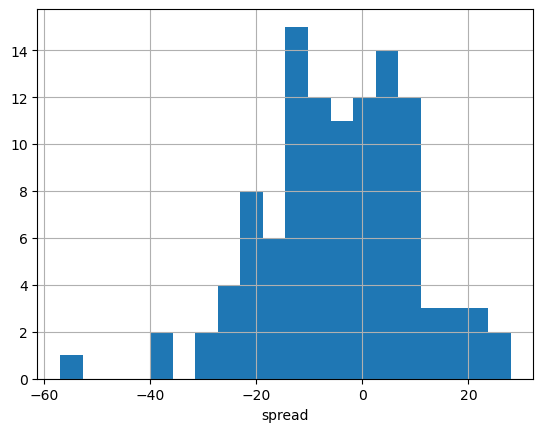

In [10]:
#what is the mean spread for no spectator data?  The median spread?  
print('mean = ', df_NBA_no_spec['spread'].mean())
print('median = ', df_NBA_no_spec['spread'].median())

plt.xlabel('spread')
df_NBA_no_spec['spread'].hist(bins=20)

In [11]:
#wow, that's not what I expected.  There's a negative home team "advantage".  Is this a 
#function of some other factor than no crowds?  Owners of weaker teams were more
#likely to forgo ticket income?  Players in cities with heavier COVID restrictions were 
#more likely to be demoralized?  A deeper dive into the specifics of each team's situation might
#be enlightening.


In [12]:
#what does the home team advantage for teams with spectators.  Let's first look at just that 2021 season.

df_NBA_21_spec = df_NBA1[(df_NBA1['season'] == 2021) & (df_NBA1['attend'].isnull()==False)]
df_NBA_21_spec

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g,away_season,away_lg,away_team,away_abbreviation,away_playoffs,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_arena,away_attend,away_attend_g,home_score,away_score
13920,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Boston Celtics,BOS,True,25.1,36.0,36.0,39.0,33.0,1.46,-0.14,1.32,114.0,112.5,1.5,98.3,0.234,0.409,0.574,0.543,12.5,24.3,0.181,0.539,12.8,78.1,0.215,TD Garden,30067.0,835.0,127,112
13921,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Brooklyn Nets,BRK,True,28.2,48.0,24.0,46.0,26.0,4.50,-0.27,4.24,118.3,113.8,4.5,99.5,0.258,0.413,0.610,0.575,12.2,21.4,0.208,0.531,11.1,77.3,0.187,Barclays Center,30491.0,847.0,128,132
13922,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Chicago Bulls,CHI,False,25.6,31.0,41.0,34.0,38.0,-0.89,-0.05,-0.94,111.1,112.0,-0.9,99.0,0.197,0.383,0.575,0.547,13.6,22.3,0.156,0.538,11.6,80.3,0.196,United Center,13655.0,379.0,108,97
13923,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Charlotte Hornets,CHO,False,24.6,33.0,39.0,32.0,40.0,-1.93,-0.01,-1.94,110.9,112.8,-1.9,98.3,0.238,0.422,0.564,0.532,13.3,23.5,0.181,0.550,13.2,75.7,0.163,Spectrum Center,68255.0,1896.0,94,102
13924,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Cleveland Cavaliers,CLE,False,24.0,22.0,50.0,18.0,54.0,-8.44,0.25,-8.19,105.8,114.4,-8.6,97.3,0.261,0.347,0.543,0.508,13.9,23.6,0.194,0.556,13.0,76.6,0.183,Rocket Mortgage Fieldhouse,91476.0,2541.0,100,82
13925,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Dallas Mavericks,DAL,True,26.3,42.0,30.0,41.0,31.0,2.26,-0.01,2.26,115.4,113.0,2.4,97.3,0.242,0.436,0.582,0.550,11.1,21.1,0.189,0.534,11.5,77.8,0.197,American Airlines Center,94849.0,2635.0,116,122
13926,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Denver Nuggets,DEN,True,26.1,47.0,25.0,47.0,25.0,4.93,-0.11,4.82,117.1,112.1,5.0,97.1,0.219,0.383,0.588,0.557,12.1,24.7,0.176,0.545,12.9,78.9,0.200,Ball Arena,54563.0,1516.0,123,115
13927,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,Detroit Pistons,DET,False,24.5,20.0,52.0,26.0,46.0,-4.47,0.09,-4.38,108.0,112.5,-4.5,97.9,0.273,0.385,0.556,0.519,13.5,21.9,0.207,0.541,12.6,76.9,0.195,Little Caesars Arena,14250.0,396.0,123,115
13928,2021,NBA,Atlanta Hawks,ATL,True,25.4,41.0,31.0,41.0,31.0,2.32,-0.18,2.14,115.7,113.3,2.4,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226,0.530,11.1,77.8,0.190,State Farm Arena,59288.0,1647.0,2021,NBA,G

mean =  1.9930555555555556
median =  3.0


C:\Users\johann\AppData\Local\Temp\ipykernel_4956\3776389647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NBA_21_spec['spread'] = df_NBA_21_spec['home_score'] - df_NBA_21_spec['away_score']


<Axes: xlabel='spread'>

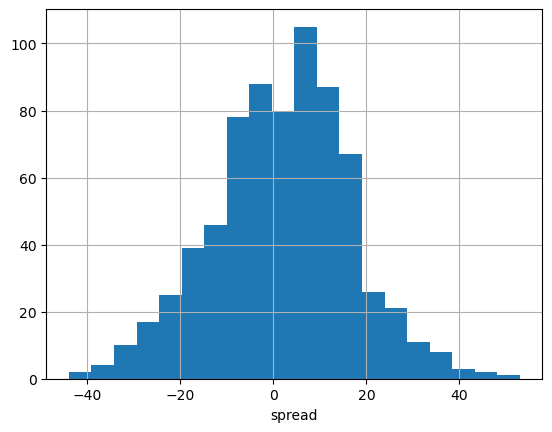

In [13]:
#mean and median spread for teams with attendance

df_NBA_21_spec['spread'] = df_NBA_21_spec['home_score'] - df_NBA_21_spec['away_score']

print('mean = ', df_NBA_21_spec['spread'].mean())
print('median = ', df_NBA_21_spec['spread'].median())

plt.xlabel('spread')
df_NBA_21_spec['spread'].hist(bins=20)

In [14]:
# drop the 2021 (COVID) season and look at home team advantage

pd.set_option('display.max_rows', 20)

df_NBA_no_21 = df_NBA1[df_NBA1['season'] != 2021]
df_NBA_no_21.head()


,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g,away_season,away_lg,away_team,away_abbreviation,away_playoffs,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_arena,away_attend,away_attend_g,home_score,away_score
0,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Boston Celtics,BOS,True,27.1,45.0,37.0,43.0,39.0,0.87,-0.52,0.35,107.5,106.6,0.9,93.3,0.357,0.192,0.551,0.501,14.7,27.2,0.273,0.481,14.2,70.1,0.274,FleetCenter,656081.0,16002.0,120,117
1,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Charlotte Bobcats,CHA,False,24.9,18.0,64.0,24.0,58.0,-5.99,-0.16,-6.15,101.1,107.5,-6.4,92.3,0.306,0.128,0.497,0.455,13.3,29.5,0.217,0.497,14.7,70.9,0.269,Charlotte Coliseum,591701.0,14432.0,90,93
2,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Chicago Bulls,CHI,True,25.0,47.0,35.0,44.0,38.0,1.06,-0.41,0.65,101.4,100.3,1.1,92.4,0.311,0.217,0.517,0.471,15.5,28.4,0.233,0.454,14.4,72.6,0.262,United Center,828384.0,20204.0,105,114
5,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Denver Nuggets,DEN,True,26.7,49.0,33.0,47.0,35.0,2.02,0.20,2.23,106.0,103.9,2.1,93.5,0.350,0.142,0.535,0.483,13.8,28.4,0.267,0.482,15.1,71.7,0.247,Pepsi Center,723949.0,17657.0,110,107
6,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Detroit Pistons,DET,True,27.9,54.0,28.0,53.0,29.0,3.87,-0.55,3.31,105.6,101.2,4.4,87.2,0.335,0.164,0.519,0.472,13.3,31.2,0.247,0.461,13.5,73.0,0.207,The Palace of Auburn Hills,905116.0,22076.0,68,95


mean =  2.792355911544489
median =  4.0


C:\Users\johann\AppData\Local\Temp\ipykernel_4956\1998658605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NBA_no_21['spread'] = df_NBA_no_21['home_score'] - df_NBA_no_21['away_score']


<Axes: xlabel='spread'>

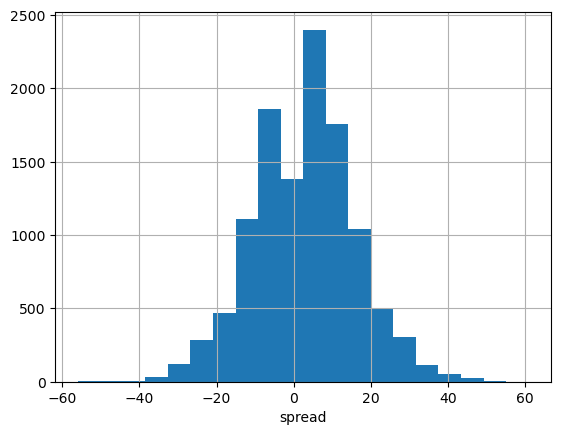

In [15]:
#mean and median for spread for non-2021 data
df_NBA_no_21['spread'] = df_NBA_no_21['home_score'] - df_NBA_no_21['away_score']

print('mean = ', df_NBA_no_21['spread'].mean())
print('median = ', df_NBA_no_21['spread'].median())

plt.xlabel('spread')
df_NBA_no_21['spread'].hist(bins=20)

In [16]:
#error of spread (standard deviation) is 11-11.5 points depending on how you might weigh each spread in the 
#distribution.  If I trim the data to only inlcude spreads of +-15 as in the article, an unweighted average 
#doesn't seem like a horrible estimate given the distributions above.  

#Using an unweighted average, standard deviation is 11.2

#https://www.boydsbets.com/ats-margin-standard-deviations-by-point-spread/

In [17]:
#let's see how close I can get to the oddsmaker's accuracy using various algorithms using th no COVID year data

df_NBA_no_21.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g,away_season,away_lg,away_team,away_abbreviation,away_playoffs,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_arena,away_attend,away_attend_g,home_score,away_score,spread
0,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Boston Celtics,BOS,True,27.1,45.0,37.0,43.0,39.0,0.87,-0.52,0.35,107.5,106.6,0.9,93.3,0.357,0.192,0.551,0.501,14.7,27.2,0.273,0.481,14.2,70.1,0.274,FleetCenter,656081.0,16002.0,120,117,3
1,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Charlotte Bobcats,CHA,False,24.9,18.0,64.0,24.0,58.0,-5.99,-0.16,-6.15,101.1,107.5,-6.4,92.3,0.306,0.128,0.497,0.455,13.3,29.5,0.217,0.497,14.7,70.9,0.269,Charlotte Coliseum,591701.0,14432.0,90,93,-3
2,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Chicago Bulls,CHI,True,25.0,47.0,35.0,44.0,38.0,1.06,-0.41,0.65,101.4,100.3,1.1,92.4,0.311,0.217,0.517,0.471,15.5,28.4,0.233,0.454,14.4,72.6,0.262,United Center,828384.0,20204.0,105,114,-9
5,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Denver Nuggets,DEN,True,26.7,49.0,33.0,47.0,35.0,2.02,0.20,2.23,106.0,103.9,2.1,93.5,0.350,0.142,0.535,0.483,13.8,28.4,0.267,0.482,15.1,71.7,0.247,Pepsi Center,723949.0,17657.0,110,107,3
6,2005,NBA,Atlanta Hawks,ATL,False,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,Philips Arena,586390.0,14302.0,2005,NBA,Detroit Pistons,DET,True,27.9,54.0,28.0,53.0,29.0,3.87,-0.55,3.31,105.6,101.2,4.4,87.2,0.335,0.164,0.519,0.472,13.3,31.2,0.247,0.461,13.5,73.0,0.207,The Palace of Auburn Hills,905116.0,22076.0,68,95,-27


In [18]:
#The nominal features don't look too helpful
#create a DataFrame with only numerical features

df_NBA_no_21_num_col = df_NBA_no_21.columns[df_NBA_no_21.dtypes != 'object']
df_NBA_no_21_numeric = df_NBA_no_21[df_NBA_no_21_num_col]
df_NBA_no_21_numeric.shape

(11486, 57)

In [19]:
#drop season, away_season, playoffs, and away_playoffs.  Seasons are identical for each team matchup.
#games in dataset occur before playoff qualification determined
#leave 'season' for stratifying training and test sets

df_NBA_no_21_numeric1 = df_NBA_no_21_numeric.drop(['away_season', 'playoffs', 'away_playoffs'], axis=1)
df_NBA_no_21_numeric1.head()

,season,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g,away_age,away_w,away_l,away_pw,away_pl,away_mov,away_sos,away_srs,away_o_rtg,away_d_rtg,away_n_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_e_fg_percent,away_tov_percent,away_orb_percent,away_ft_fga,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score,spread
0,2005,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,586390.0,14302.0,27.1,45.0,37.0,43.0,39.0,0.87,-0.52,0.35,107.5,106.6,0.9,93.3,0.357,0.192,0.551,0.501,14.7,27.2,0.273,0.481,14.2,70.1,0.274,656081.0,16002.0,120,117,3
1,2005,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,586390.0,14302.0,24.9,18.0,64.0,24.0,58.0,-5.99,-0.16,-6.15,101.1,107.5,-6.4,92.3,0.306,0.128,0.497,0.455,13.3,29.5,0.217,0.497,14.7,70.9,0.269,591701.0,14432.0,90,93,-3
2,2005,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,586390.0,14302.0,25.0,47.0,35.0,44.0,38.0,1.06,-0.41,0.65,101.4,100.3,1.1,92.4,0.311,0.217,0.517,0.471,15.5,28.4,0.233,0.454,14.4,72.6,0.262,828384.0,20204.0,105,114,-9
5,2005,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,586390.0,14302.0,26.7,49.0,33.0,47.0,35.0,2.02,0.20,2.23,106.0,103.9,2.1,93.5,0.350,0.142,0.535,0.483,13.8,28.4,0.267,0.482,15.1,71.7,0.247,723949.0,17657.0,110,107,3
6,2005,26.0,13.0,69.0,16.0,66.0,-9.71,0.09,-9.62,100.6,111.1,-10.5,91.4,0.299,0.146,0.504,0.464,14.9,30.7,0.212,0.513,14.0,72.1,0.289,586390.0,14302.0,27.9,54.0,28.0,53.0,29.0,3.87,-0.55,3.31,105.6,101.2,4.4,87.2,0.335,0.164,0.519,0.472,13.3,31.2,0.247,0.461,13.5,73.0,0.207,905116.0,22076.0,68,95,-27


In [43]:
#create training and test sets
train_set, test_val_set = train_test_split(df_NBA_no_21_numeric1, test_size=0.2, 
                                       stratify=df_NBA_no_21_numeric1['season'], random_state=42)
#separate into data (X) and targets(y).  Remove "season" and 'home_score' and 'away_score'
X_train = train_set.iloc[:,1:-3]
y_train = train_set.iloc[:,-1]

test_set, val_set = train_test_split(test_val_set, test_size=0.5, 
                                       stratify=test_val_set['season'], random_state=42)

X_test = test_set.iloc[:,1:-3]
y_test = test_set.iloc[:,-1]

X_val = val_set.iloc[:,1:-3]
y_val = val_set.iloc[:,-1]

In [37]:
#z-score normalize the data
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
X_val_ss = ss.transform(X_val)

In [22]:
#train nearest neighbor model
knn = KNeighborsRegressor()

print('knn RMSE', cross_val_score(knn, X_train_ss, y_train, cv=5, scoring='neg_root_mean_squared_error'))
#knn RMSE [-13.43051679 -13.33853508 -13.2353329  -13.02540293 -12.95408667]
#not horrible...how much improvement is possible with hyperparameter optimization

knn RMSE [-13.43051679 -13.33853508 -13.2353329  -13.02540293 -12.95408667]


In [23]:
%%time

#Grid search hyperparameters

param_knn = [{'n_neighbors': [3, 5, 10, 20, 40], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train_ss, y_train)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

"""{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'distance'}
-12.304323681229407
CPU times: total: 422 ms
Wall time: 43.1 s"""

#not bad.  Try again with more #neigbors options.

{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'distance'}
-12.304323681229407
CPU times: total: 797 ms
Wall time: 1min 12s


"{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'distance'}\n-12.304323681229407\nCPU times: total: 422 ms\nWall time: 43.1 s"

In [24]:
%%time

#Grid search hyperparameters

param_knn = [{'n_neighbors': [20, 40, 80, 160], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train_ss, y_train)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

"""{'algorithm': 'auto', 'n_neighbors': 160, 'weights': 'distance'}
-12.25840232774937
CPU times: total: 594 ms
Wall time: 48.9 s"""

#I'm starting to get a little nervous here that the mean of all the data might have a pretty good RMSE

{'algorithm': 'auto', 'n_neighbors': 160, 'weights': 'distance'}
-12.25840232774937
CPU times: total: 828 ms
Wall time: 1min 2s


"{'algorithm': 'auto', 'n_neighbors': 160, 'weights': 'distance'}\n-12.25840232774937\nCPU times: total: 594 ms\nWall time: 48.9 s"

In [25]:
%%time

#Grid search hyperparameters

param_knn = [{'n_neighbors': [80, 160, 320, 640], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train_ss, y_train)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

#okay, so 160 neighbors is best.  -12.26 isn't bad.  There are a good number of redundant features in this dataset. 
#Maybe try removing highly correlated features next.

{'algorithm': 'auto', 'n_neighbors': 160, 'weights': 'distance'}
-12.25840232774937
CPU times: total: 641 ms
Wall time: 1min 4s


In [45]:
#what does the range of predictions look like using new parameters
knn_160 = KNeighborsRegressor(n_neighbors = 160, weights = 'distance')
knn_160.fit(X_train_ss, y_train)
y_hat_knn_160 = knn_160.predict(X_val_ss)

print('RMSE mean = ', mean_squared_error(y_val, y_hat_knn_160, squared = False))

RMSE mean =  12.347457385693463


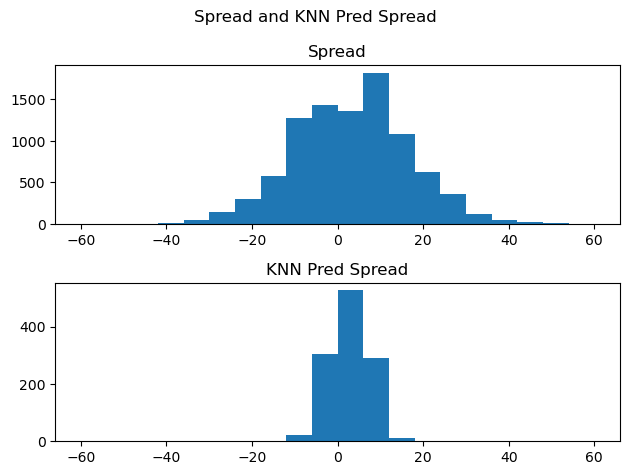

In [46]:
#histogram of spread and predicted spread stacked
fig, axs = plt.subplots(2,1)
fig.suptitle('Spread and KNN Pred Spread')

axs[0].set_title('Spread')
axs[0].hist(y_train, bins=20, range = (-60, 60))

axs[1].set_title('KNN Pred Spread')
axs[1].hist(y_hat_knn_160, bins=20, range = (-60, 60))

fig.tight_layout()
plt.show()

#wow, these look closer than I expected


In [28]:
#what is the RMSE if the prediction is the mean spread for each game
dum_mean = DummyRegressor(strategy='mean')
dum_mean.fit(X_train_ss, y_train)

y_hat = dum_mean.predict(X_train_ss)
print('RMSE mean = ', mean_squared_error(y_train, y_hat, squared = False))
#RMSE mean =  13.271668858082634

RMSE mean =  13.271668858082634


In [29]:
#what is the RMSE if the prediction is the median spread for each game
dum_median = DummyRegressor(strategy='median')
dum_median.fit(X_train_ss, y_train)

y_hat = dum_median.predict(X_train_ss)
print('RMSE median = ', mean_squared_error(y_train, y_hat, squared = False))
#RMSE median =  13.324983327210571

#so, the KNN model with optimized parameters is one point better than just using the mean or median

RMSE median =  13.324983327210571


RMSE mean =  12.382995901597578


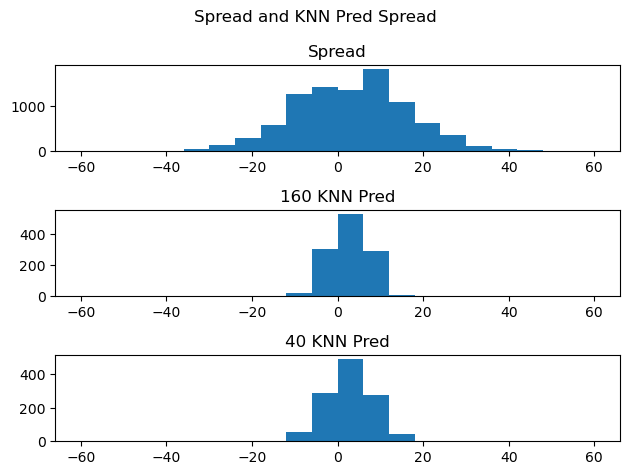

In [47]:
#40 nearest neighbors wasn't all that worse in terms of RMSE than 160.  What does that distribution look like.
#it should contain more variance, although 160 looked just fine too

#predict using 40 nearest neighbors
knn_40 = KNeighborsRegressor(n_neighbors = 40, weights = 'distance')
knn_40.fit(X_train_ss, y_train)
y_hat_knn_40 = knn_40.predict(X_val_ss)

print('RMSE mean = ', mean_squared_error(y_val, y_hat_knn_40, squared = False))

#histogram 
fig, axs = plt.subplots(3,1)
fig.suptitle('Spread and KNN Pred Spread')

axs[0].set_title('Spread')
axs[0].hist(y_train, bins=20, range = (-60, 60))

axs[1].set_title('160 KNN Pred')
axs[1].hist(y_hat_knn_160, bins=20, range = (-60, 60))

axs[2].set_title('40 KNN Pred')
axs[2].hist(y_hat_knn_40, bins=20, range = (-60, 60))

fig.tight_layout()
plt.show()

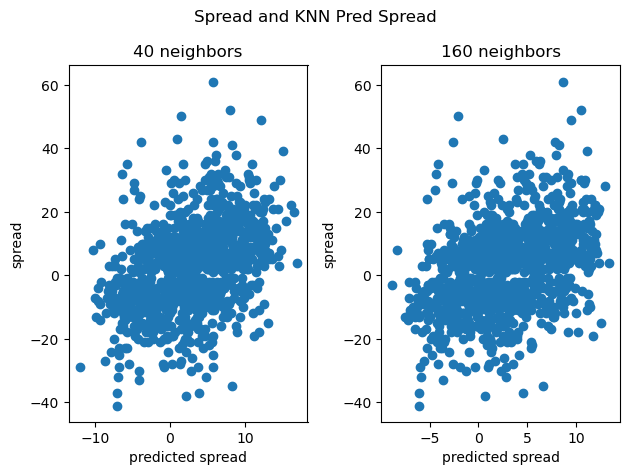

In [51]:
#plot spread vs. pred spread for 40 neighbors and 160 neighbors

fig, axs = plt.subplots(1,2)
fig.suptitle('Spread and KNN Pred Spread')

axs[0].set_xlabel('predicted spread')
axs[0].set_ylabel('spread')
axs[0].set_title('40 neighbors')
axs[0].scatter(y_hat_knn_40,y_val)

axs[1].set_xlabel('predicted spread')
axs[1].set_ylabel('spread')
axs[1].set_title('160 neighbors')
axs[1].scatter(y_hat_knn_160, y_val)

fig.tight_layout()
plt.show()

#itentical is this the weights?  There's going to be an identical point.  Does it get overwhelming 
#influence on the result?  Make a validation set.  It will contain about 1000 instances.